In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [3]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 6 elements

In [ ]:
# min-max normalization
# predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
# predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [ ]:
df = pd.concat([
            predict,
            predict_probability,
            true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,true,predict_label,true_label
0,4.224503e-14,2.767559e-15,3.609872e-19,1.858428e-21,9.955337e-01,4.466284e-03,0.995534,5,Upstairs,Walking
1,4.803544e-17,2.980635e-23,1.000000e+00,5.450902e-09,3.907959e-13,5.243662e-16,1.000000,2,Sitting,Sitting
2,6.407442e-15,5.499134e-21,3.331585e-17,1.198886e-22,1.000000e+00,7.023575e-11,1.000000,4,Upstairs,Upstairs
3,1.142482e-07,9.999998e-01,3.919300e-23,3.329433e-20,6.569428e-08,1.066810e-09,1.000000,1,Jogging,Jogging
4,5.151136e-07,1.267088e-13,1.802384e-07,9.999939e-01,5.430920e-06,4.737786e-08,0.999994,3,Standing,Standing
5,5.385156e-17,7.523510e-14,1.233026e-34,2.556183e-37,5.494511e-25,1.000000e+00,1.000000,5,Walking,Walking
6,9.312923e-01,1.501045e-10,6.852636e-11,3.390784e-09,6.870432e-02,3.325675e-06,0.931292,0,Downstairs,Downstairs
7,9.999617e-01,4.416394e-10,5.405318e-12,1.275089e-13,3.818550e-05,8.161733e-08,0.999962,0,Downstairs,Downstairs
8,4.688180e-14,1.000000e+00,5.565252e-36,1.981342e-28,2.105169e-16,5.233290e-24,1.000000,1,Jogging,Jogging
9,4.386196e-30,3.300405e-09,1.045978e-37,0.000000e+00,1.810373e-22,1.000000e+00,1.000000,5,Walking,Walking


Accuracy:  0.9548379264295254


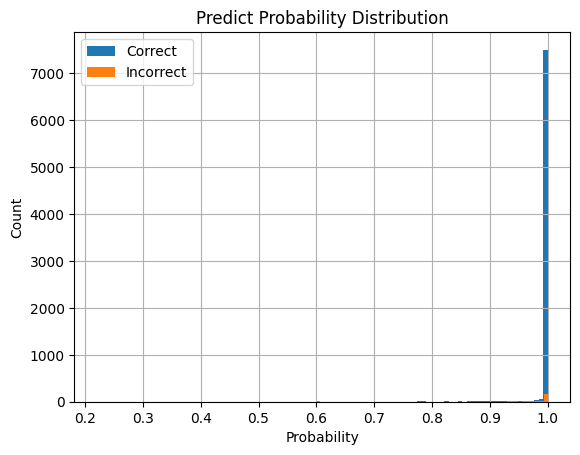

In [ ]:
print('Accuracy: ', calc_accuracy(df))
# statival analysis
df.loc[df.true_label==df.predict_label, 'predict_probability'].hist(bins=100)
df.loc[df.true_label!=df.predict_label, 'predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(['Correct', 'Incorrect'])

In [ ]:
df['predict_probability'].agg(['mean', 'std', 'min', 'max', 'median'])

mean      0.988647
std       0.062154
min       0.220784
max       1.000000
median    1.000000
Name: predict_probability, dtype: float64

In [ ]:
thresholds = [0, 0.7, 0.9, 0.99, 0.999, 0.99999,]
results = []
for threshold in thresholds:
    df_confidence = df[df['predict_probability'] > threshold]
    df_drop = df.loc[list(set(df.index) - set(df_confidence.index)),:]
    results.append({
        'threshold': threshold,
        'confidence_accuracy': calc_accuracy(df_confidence),
        'confidence_raito': len(df_confidence) / len(df),
        'drop_accuracy': calc_accuracy(df_drop),
        'drop_ratio': len(df_drop) / len(df),
        })
    df_confidence = df[df['predict_probability'] > threshold]
    df_drop = df.loc[list(set(df.index) - set(df_confidence.index)),:]
    cm = confusion_matrix(df_confidence['true_label'], df_confidence['predict_label'])
    cm_df = pd.DataFrame(cm, index=LABELS, columns=LABELS)
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        cm_df,
        annot=True,
        fmt="d",
        linewidths=0.5,
        cmap="Blues",
        cbar=False,
        annot_kws={"size": 14},
        square=True,
    )
    plt.title(f"Confusion Matrix (threshold={threshold})")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.savefig(f'confusion_matrix/threshold{threshold}.png')
    plt.close()
results = pd.DataFrame(results).fillna(0)
results = results.set_index('threshold')
results

/tmp/ipykernel_290392/3327794854.py:2: RuntimeWarning: invalid value encountered in long_scalars
  return (df['true_label'] == df['predict_label']).sum() / len(df)


,confidence_accuracy,confidence_raito,drop_accuracy,drop_ratio
threshold,,,,
0.00000,0.954838,1.000000,0.000000,0.000000
0.70000,0.961193,0.985432,0.525000,0.014568
0.90000,0.966625,0.967585,0.602996,0.032415
0.99000,0.975746,0.936020,0.648956,0.063980
0.99900,0.983074,0.896564,0.710094,0.103436
0.99999,0.990027,0.815588,0.799210,0.184412
